In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!pip install tensorflow

     -------------------------------------- 284.1/284.1 MB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 130.2/130.2 kB ? eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 18.5 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ------------------------------------- 440.7/440.7 kB 28.7 MB/s eta 0:00:00
     --------------------------------------- 24.4/24.4 MB 21.1 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 1.7/1.7 MB 27.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 23.4 MB/s eta 0:00:00
     ------------------------------------- 938.6/938.6 kB 29.9 MB/s eta 0:00:00
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
     -------------------------------------- 151.7/151.7 kB 9.4 MB/s eta 0:00:00


In [5]:
from tensorflow.keras.datasets import mnist

In [7]:
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

x_train is 60,000 images and each image is 28 by 28 pixels

In [10]:
# lets grab a single image
single_image = x_train[0]

In [11]:
single_image.shape

(28, 28)

In [12]:
# raw values
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

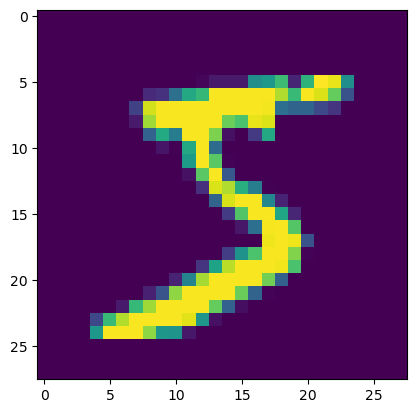

In [13]:
plt.imshow(single_image)

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

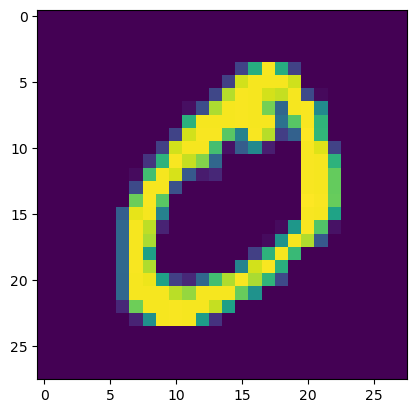

In [15]:
plt.imshow(x_train[1])

# One-hot encoding

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_train.shape

(60000,)

In [21]:
y_train[0]

5

In [18]:
# converting to binary class matrix
y_example = to_categorical(y_train)

In [19]:
y_example.shape

(60000, 10)

In [20]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [23]:
y_cat_train = to_categorical(y_train, num_classes=10)

# Normalizing the training data

In [25]:
single_image.max()

255

In [26]:
single_image.min()

0

In [27]:
x_train = x_train/255
x_test = x_test/255

In [28]:
scaled_image = x_train[0]

In [40]:
# scaled_image

Here the values go from 0 uo to 1

In [31]:
scaled_image.max()

1.0

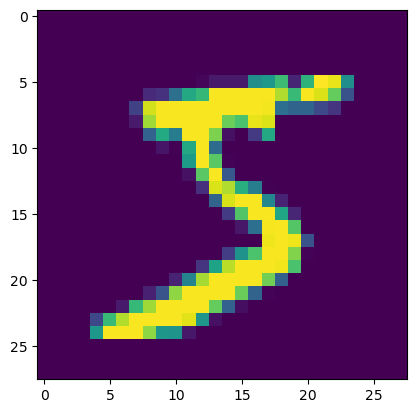

In [33]:
plt.imshow(scaled_image)

# Reshaping the data

In [34]:
x_train.shape

(60000, 28, 28)

In [35]:
# we need to add one mpre dimension to let the network know that we are dealing with a single RGB channel
# batch_size, width, height, color_channels
x_train = x_train.reshape(60000,28,28,1)

In [36]:
x_test.shape

(10000, 28, 28)

In [37]:
# batch_size, width, height, color_channels
x_test = x_test.reshape(10000,28,28,1)

# Training the Model

In [38]:
from tensorflow.keras.models import Sequential

In [39]:
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D,Flatten

In [41]:
model =Sequential()

# here, we will have 1 covolutional layer and 1 pooling layer
model.add(Conv2D(filters = 32, kernel_size=(4,4),
                input_shape = (28,28,1), 
                activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#flattening out the image --> making it a single array
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

# OUTPUT LAYER   SOFTMAX--> MULTI CLASS
model.add(Dense(10, activation = 'softmax')) #neurons should be equal to classes

# keras.io/metrics
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
early_stop = EarlyStopping(monitor='val_loss',
                          patience= 1)

In [44]:
model.fit(x_train, y_cat_train, epochs = 10, 
         validation_data=(x_test, y_cat_test),
         callbacks= [early_stop])

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.1400 - accuracy: 0.9577 - val_loss: 0.0501 - val_accuracy: 0.9837
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0464 - accuracy: 0.9851 - val_loss: 0.0410 - val_accuracy: 0.9863
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0311 - accuracy: 0.9903 - val_loss: 0.0387 - val_accuracy: 0.9856
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0392 - val_accuracy: 0.9867


# Model Evaluation

In [48]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

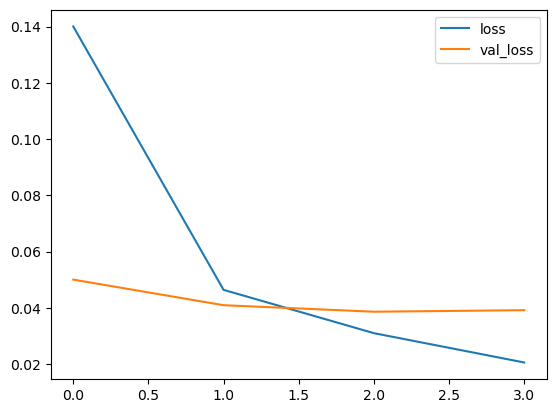

In [50]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

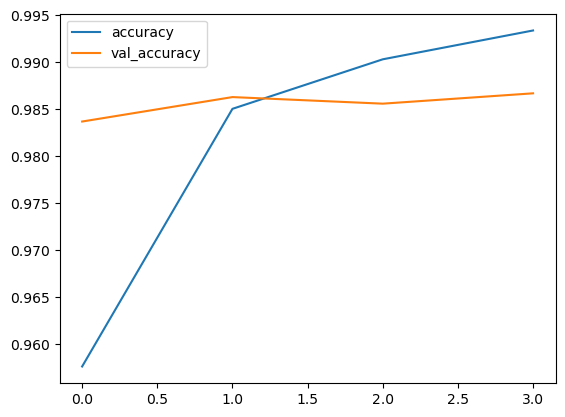

In [52]:
metrics[['accuracy','val_accuracy']].plot()

In [53]:
model.metrics_names

['loss', 'accuracy']

In [54]:
# for loss and accuracy on the test set
model.evaluate(x_test, y_cat_test, verbose= 0)

[0.03921045362949371, 0.9866999983787537]

In [55]:
# for loss and accuracy on the train set
model.evaluate(x_train, y_cat_train, verbose= 0)

[0.012577945366501808, 0.9963666796684265]

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
predictions = (model.predict(x_test) > 0.5).astype('int32')

313/313 [==============================] - 1s 3ms/step


In [79]:
y_test[0]

7

In [77]:
predictions[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [84]:
from scipy.sparse import coo_matrix

In [89]:
# convert y_test to sparse matrix
y_test_sparse = coo_matrix(([1] * len(y_test), (range(len(y_test)), y_test)))

In [88]:
predictions_sparse = coo_matrix(predictions)

In [97]:
# print classification report
print(classification_report(y_test, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [98]:
print(confusion_matrix(y_test, predictions.argmax(axis=1)))

[[ 976    0    1    1    0    0    1    0    1    0]
 [   1 1133    0    0    0    0    1    0    0    0]
 [   3    4 1017    2    1    0    0    4    1    0]
 [   2    0    2 1002    0    2    0    0    1    1]
 [   2    0    0    0  977    0    0    0    0    3]
 [   2    1    0   12    0  874    1    0    1    1]
 [   9    4    0    1    4    1  937    0    2    0]
 [   5    1    7    0    0    0    0 1014    0    1]
 [   7    2    5    4    1    1    0    3  946    5]
 [   7    3    0    2    7    1    0    4    0  985]]


In [99]:
import seaborn as sns

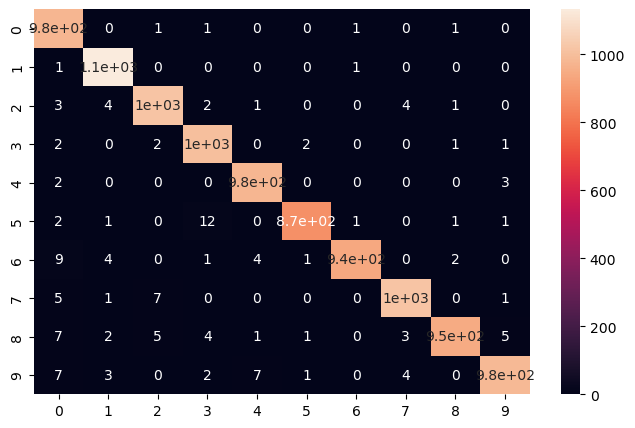

In [108]:
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test, predictions.argmax(axis=1)), annot=True);